In [1]:
# Imports
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from utils import show_imgs
import os
from PIL import Image
from sklearn import svm
from sklearn import metrics
import sys
import os

In [2]:
def list_images(basePath, contains=None):
    # return the set of files that are valid
    return list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=contains)

def list_files(basePath, validExts=(".jpg", ".jpeg", ".png", ".bmp"), contains=None):
    paths = []
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        for filename in filenames:
            if contains is not None and filename.find(contains) == -1:
                continue
            ext = filename[filename.rfind("."):].lower()
            if ext.endswith(validExts):
                imagePath = os.path.join(rootDir , filename)
                paths.append( imagePath)
    return paths 

Dict = {"cat" : 0 , "flower" :1  }


def load_images(directory='', size=(64,64)):
    images = []
    labels = []  # Integers corresponding to the categories in alphabetical order
    label = 0
    imagePaths = list(list_images(directory))
    for path in imagePaths:
        if not('OSX' in path):
            image = Image.open(path)
            image_array = np.array(image)
            # np.resize(image_array , (32 , 32 ))
            file_name = os.path.splitext(os.path.basename(path))[0]
            category = file_name.split()[0]
            labels.append(Dict[category])
            images.append(image_array)
    return images,labels

In [3]:
images,labels = load_images( 'images')

In [4]:
def rgb2grayscale(images) :
    gray_scale_images = []
    for rgb_image in images : 
        pil_image = Image.fromarray(rgb_image)
        gray_image = pil_image.convert("L")
        gray_image_array = np.array(gray_image)
        gray_scale_images.append(gray_image_array)

    return gray_scale_images 




In [5]:
gray_images = rgb2grayscale(images=images)

In [7]:
from skimage.transform import resize
target_size = (64 , 64 )
resized_images = [resize(image, target_size) for image in gray_images]


(22100, 64, 64)
<class 'numpy.ndarray'>


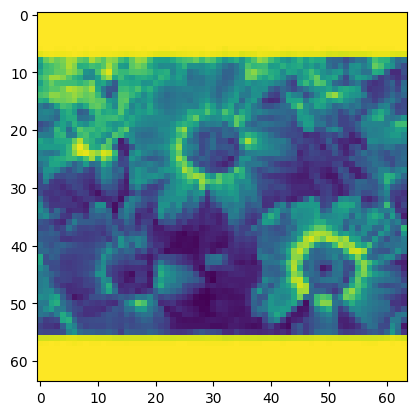

In [11]:
# resized_images = np.concatenate( resized_images )
array_of_images = np.array(resized_images)
print(array_of_images.shape)
print(type(array_of_images[0]))
plt.imshow( array_of_images[22000])



In [9]:
import matplotlib.pyplot as plt 
def show_imgs(x_test, decoded_imgs=None, n=10,s=28):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(s,s))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(s,s))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()




In [13]:
combined = list(zip(array_of_images ,labels))
random.shuffle(combined)
array_of_images[:],labels[:] = zip(*combined)


In [14]:
feature_vector_length = 4096
X_train, X_test, Y_train, Y_test = train_test_split(array_of_images,labels, test_size=0.3 , random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# X_train = X_train.reshape(X_train.shape[0], feature_vector_length)/255.0
# X_test = X_test.reshape(X_test.shape[0], feature_vector_length)/255.0

# # Reshape the data - MLPs do not understand such things as '2D'.
# # Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
print(X_train.shape)

(15470, 4096)


In [16]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train[:6000], Y_train[:6000])

SVC()

In [17]:
ypreds = clf.predict(X_test[:3000])

In [23]:
print("accuracy in test set : " , accuracy_score( Y_test[:3000] , ypreds ))

ypreds

accuracy in test set :  0.5113333333333333


array([1, 1, 0, ..., 1, 1, 0])

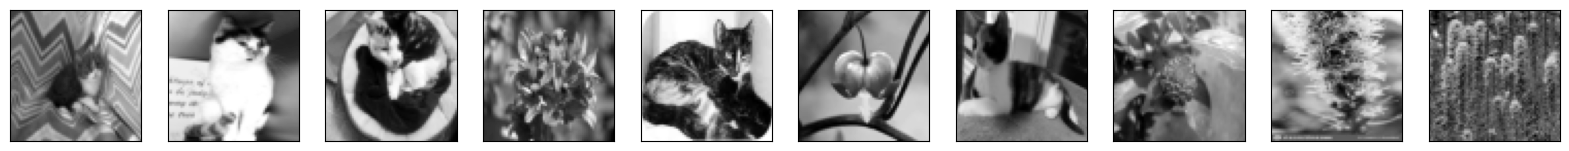

prediction of test set 
cat cat flower flower flower cat cat flower cat cat


In [24]:
show_imgs(X_test[30:40] , s=64)
print("prediction of test set ")
result = ' '.join(['flower' if x == 1 else 'cat' for x in ypreds[30 : 40 ]])
print(result)

In [25]:
ypreds_train = clf.predict(X_train[:4000])
print("accuracy in train set : " , accuracy_score( Y_train[:4000] , ypreds_train ))
ypreds_train

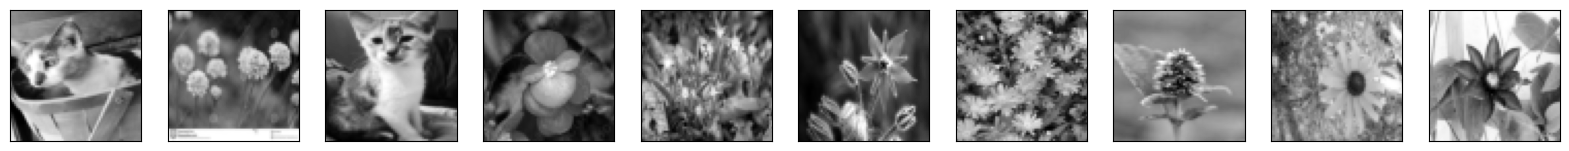

prediction of train set :
flower cat cat flower flower flower flower flower flower cat


In [ ]:
show_imgs(X_train[30:40] , s = 64)
print("prediction of train set :")

result = ' '.join(['flower' if x == 1 else 'cat' for x in ypreds_train[30 : 40 ]])
print(result)

# plt.imshow(X_train[6])